#### Tarea 2 Understanding
#### Aplication to champagne Brand choise

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('datasets/Data2_Aplication_to_champagne_Brand_choise.txt', delim_whitespace=True, index_col= 'PID')
data.head()

,CHOSEN,GENDER,AGE,WORK,GRAD,RELIG,STUDENT,MARRIED,PURCH,FACEBOOK,...,SMELL_VCP,SMELL_HM,COLOR_DEL,COLOR_GOS,COLOR_VCP,COLOR_HM,ADV_DEL,ADV_GOS,ADV_VCP,ADV_HM
PID,,,,,,,,,,,,,,,,,,,,,
1,2,2,51,2,1,2,1,3,2,2,...,4,4,4,5,4,5,1,4,4,3
2,3,1,40,1,1,3,1,1,2,1,...,4,3,5,5,5,4,1,3,1,1
3,2,1,25,1,1,2,1,1,1,1,...,5,4,3,4,4,3,4,3,3,3
4,1,1,50,2,1,1,1,3,2,2,...,5,3,4,5,5,4,4,3,3,1
5,2,2,38,1,1,1,2,3,2,1,...,5,5,3,4,4,4,3,5,3,4


### valores faltantes y tipo de datos

In [3]:
data.describe()

,CHOSEN,GENDER,AGE,WORK,GRAD,RELIG,STUDENT,MARRIED,PURCH,FACEBOOK,...,SMELL_VCP,SMELL_HM,COLOR_DEL,COLOR_GOS,COLOR_VCP,COLOR_HM,ADV_DEL,ADV_GOS,ADV_VCP,ADV_HM
count,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,...,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000
mean,2.359394,1.417609,34.942988,1.513832,1.574934,1.559779,1.585037,1.598990,1.698100,1.497955,...,4.132066,4.088525,4.115227,4.185951,4.186914,4.071446,3.442386,3.126534,3.165745,3.134713
std,0.813012,0.493224,10.183725,0.678356,0.733482,0.803684,0.752153,0.731939,0.459138,0.500056,...,0.809962,0.761094,0.754168,0.807398,0.839899,0.748721,1.251703,1.126443,1.104806,1.110862
min,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,26.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000
50%,2.000000,1.000000,35.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000
75%,3.000000,2.000000,44.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,4.000000,2.000000,52.000000,3.000000,3.000000,4.000000,3.000000,3.000000,2.000000,2.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [4]:
data.shape

(4157, 51)

In [5]:
#datos nulos
data.isnull().sum().any()

False

In [6]:
data.dtypes

CHOSEN          int64
GENDER          int64
AGE             int64
WORK            int64
GRAD            int64
RELIG           int64
STUDENT         int64
MARRIED         int64
PURCH           int64
FACEBOOK        int64
TWITTER         int64
INSTA           int64
INCOME          int64
KIDS            int64
ALONE           int64
REGION          int64
DENSIT          int64
FREQ            int64
DRINKER         int64
PRICE_DEL     float64
PRICE_GOS     float64
PRICE_VCP     float64
PRICE_HM      float64
KNOWN_DEL       int64
KNOWN_GOS       int64
KNOWN_VCP       int64
KNOWN_HM        int64
BOTTLE_DEL      int64
BOTTLE_GOS      int64
BOTTLE_VCP      int64
BOTTLE_HM       int64
INFLAB_DEL      int64
INFLAB_GOS      int64
INFLAB_VCP      int64
INFLAB_HM       int64
LAB_DEL         int64
LAB_GOS         int64
LAB_VCP         int64
LAB_HM          int64
SMELL_DEL       int64
SMELL_GOS       int64
SMELL_VCP       int64
SMELL_HM        int64
COLOR_DEL       int64
COLOR_GOS       int64
COLOR_VCP 

Como se puede observar solo se tienen datos flotantes y enteros en la base de datos, es decir, sólo hay datos numéricos, además la base de datos no presenta valores faltantes

### Análisis de los datos

#### significado de los datos
PID Person identification number

CHOSEN Chosen brand. 1: DEL, 2: GOS, 3: VCP, and 4: HM.

GENDER Individual’s gender. 1: Woman, 2: Man.

AGE Individual’s age.

WORK Individual’s work status. 1: Full time worker, 2: Part-time worker, 3: Unemployed.

GRAD Individual’s educational attainment. 1: High school or less. 2: Undergraduate university studies. 3: Graduate or post-graduate degree.

RELIG Individual’s religion. 1: No religion, 2: Christian, 3: Muslim, 4: Jewish.

STUDENT Individual’s current student status. 1: Not a student, 2: University student, 3: Graduate school student.

MARRIED Marital status. 1: Single, 2: Married, 3: Divorced.

PURCH Have you ever purchased groceries online? 1: Yes, 2: No.

FACEBOOK Are you a regular Facebook user? 1: Yes, 2: No.

TWITTER Are you a regular Twitter user? 1: Yes, 2: No.

INSTA Are you a regular Instagram user? 1: Yes, 2: No.

INCOME Individual’s income in euros per year. 1: Less than 15,000, 2: Between 15,000 and 30,000, 3: More than 30,000

KIDS Do you have kids? 1: Yes, 2: No.

ALONE Do you live alone? 1: Yes, 2: No.

REGION Individual’s residence region. 1: Grand Est, 2: Nouvelle-Aquitaine, 3: Auvergne Rhône-Alpes, 4: Bretagne, 5: Bourgogne

France-Comté, 6: Centre Val de Loire, 7: Corse, 8: Languedoc-Roussillon Midi-Pyrénées, 9: Normandie, 10: Nord-Pas-de-Calais 

Picardie, 11:Île-de-France, 12: Pays de la Loire, and 13: Provence-Alpes-Côte d’Azur.

DENSIT Residential density of individual’s neighborhood. 1: Urban, 2: Suburban, 3: Rural.

FREQ How often do you drink champagne? 1: Occasional drinker, 2: Regular drinker.

DRINKER How are you as a wine drinker? 1: Absolute beginner, 2: Fairly ignorant wine-lover, 3: fairly knowledgeable wine-lover, 4: expert.

PRICE_X Price in euros of alternative X (X can be DEL, GOS, VCP, or HM).

KNOWN_X Is brand X well known? 1: Yes, 2: No.

BOTTLE_X Rate the style/design of brand X’s bottle.

INFLAB_X Rate the informative label of brand X’s bottle.

LAB_X Rate the style/design of brand X’s labels.

SMELL_X Rate the smell of brand X’s champagne.

COLOR_X Rate the color of brand X’s champagne.

ADV_X Rate the advertisement (you have seen previously to this experiment) of brand X

### Variables continuas

In [7]:
data.nunique() 

CHOSEN         4
GENDER         2
AGE           35
WORK           3
GRAD           3
RELIG          4
STUDENT        3
MARRIED        3
PURCH          2
FACEBOOK       2
TWITTER        2
INSTA          2
INCOME         3
KIDS           2
ALONE          2
REGION        11
DENSIT         3
FREQ           2
DRINKER        4
PRICE_DEL      1
PRICE_GOS      1
PRICE_VCP      1
PRICE_HM       1
KNOWN_DEL      2
KNOWN_GOS      2
KNOWN_VCP      2
KNOWN_HM       2
BOTTLE_DEL     5
BOTTLE_GOS     5
BOTTLE_VCP     5
BOTTLE_HM      5
INFLAB_DEL     5
INFLAB_GOS     5
INFLAB_VCP     5
INFLAB_HM      5
LAB_DEL        5
LAB_GOS        5
LAB_VCP        5
LAB_HM         5
SMELL_DEL      5
SMELL_GOS      5
SMELL_VCP      5
SMELL_HM       5
COLOR_DEL      5
COLOR_GOS      5
COLOR_VCP      5
COLOR_HM       5
ADV_DEL        5
ADV_GOS        5
ADV_VCP        5
ADV_HM         5
dtype: int64

In [8]:
#regiones con más de 10 tipos de valores únicos
data.columns[data.nunique() > 10]

Index(['AGE', 'REGION'], dtype='object')

Text(0.5, 1.0, 'Histograma Edad')

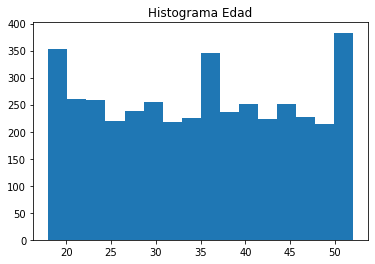

In [9]:
plt.hist(data['AGE'], bins = 'auto')
plt.title('Histograma Edad')

Text(0.5, 1.0, 'Histograma Region')

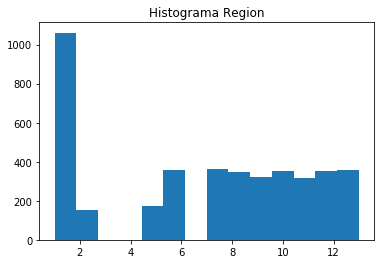

In [10]:
plt.hist(data['REGION'], bins = 'auto')
plt.title('Histograma Region')

##### Chosen

(array([ 529.,    0.,    0., 1971.,    0.,    0., 1291.,    0.,    0.,
         366.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

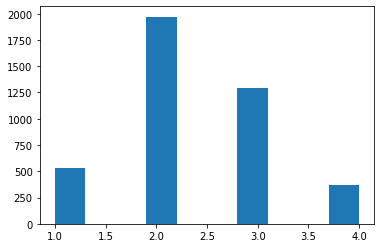

In [11]:
plt.hist(data['CHOSEN'])

### genero en la base de datos

In [12]:
pd.crosstab(data['GENDER'], data['CHOSEN'])

CHOSEN,1,2,3,4
GENDER,,,,
1,296,1201,745,179
2,233,770,546,187


### Transformar la base de datos a un string

In [13]:
data.columns

Index(['CHOSEN', 'GENDER', 'AGE', 'WORK', 'GRAD', 'RELIG', 'STUDENT',
       'MARRIED', 'PURCH', 'FACEBOOK', 'TWITTER', 'INSTA', 'INCOME', 'KIDS',
       'ALONE', 'REGION', 'DENSIT', 'FREQ', 'DRINKER', 'PRICE_DEL',
       'PRICE_GOS', 'PRICE_VCP', 'PRICE_HM', 'KNOWN_DEL', 'KNOWN_GOS',
       'KNOWN_VCP', 'KNOWN_HM', 'BOTTLE_DEL', 'BOTTLE_GOS', 'BOTTLE_VCP',
       'BOTTLE_HM', 'INFLAB_DEL', 'INFLAB_GOS', 'INFLAB_VCP', 'INFLAB_HM',
       'LAB_DEL', 'LAB_GOS', 'LAB_VCP', 'LAB_HM', 'SMELL_DEL', 'SMELL_GOS',
       'SMELL_VCP', 'SMELL_HM', 'COLOR_DEL', 'COLOR_GOS', 'COLOR_VCP',
       'COLOR_HM', 'ADV_DEL', 'ADV_GOS', 'ADV_VCP', 'ADV_HM'],
      dtype='object')

In [14]:
def GENDER_t(row):
    if row ==1:
        return 'Woman'
    else:
        return 'Men'
    
def CHOSEN_t(row):
    if row ==1:
        return 'Delamotte'
    if row ==2:
        return 'Gosset'
    if row == 3:
        return 'Veuve'
    else:
        return 'Mandois'

def WORK_t(row):
    if row == 1:
        return 'Full time worker'
    if row == 2:
        return 'Part-time worker'
    if row == 3:
        return 'Unemployed'

def GRAD_t(row):
    if row == 1:
        return 'High school or less'
    if row == 2:
        return 'Undergraduate university studies'
    if row == 3:
        return 'Graduate or post-graduate degree'

def RELIG_t(row):
    if row == 1:
        return 'No religion'
    if row == 2:
        return 'Christian'
    if row == 3:
        return 'Muslim'
    else:
        return 'Jewish'

def STUDENT_t(row):
    if row == 1:
        return 'Not a student'
    if row == 2:
        return 'University student'
    else:
        return 'Graduate school student'
    
def MARRIED_t(row):
    if row == 1:
        return 'Single'
    if row == 2:
        return 'Married'
    else:
        return 'Divorced'
    
def PURCH_t(row):
    if row == 1:
        return 'Yes'
    else:
        return 'No'

def FACEBOOK_t(row):
    if row == 1:
        return 'Yes'
    else:
        return 'No'
    
def TWITTER_t(row):
    if row == 1:
        return 'Yes'
    else:
        return 'No'

def INSTA_t(row):
    if row == 1:
        return 'Yes'
    else:
        return 'No'

def INCOME_t(row):
    if row ==1:
        return 'Less than 15,000'
    if row ==2:
        return 'Between 15,000 and 30,000'
    else:
        return 'More than 30,000'

def KIDS_t(row):
    if row == 1:
        return 'Yes'
    else:
        return 'No'
    
def ALONE_t(row):
    if row == 1:
        return 'Yes'
    else:
        return 'No'
    
def DENSIT_t(row):
    if row == 1:
        return 'Urban'
    if row == 2:
        return 'Suburban'
    else:
        return 'Rural'

def FREQ_t(row):
    if row == 1:
        return 'Occasional drinker'
    else:
        return 'Regular drinker'
def DRINKER_t(row):
    if row == 1:
        return 'Absolute beginner'
    if row == 2:
        return 'Fairly ignorant wine-lover'
    if row == 3:
        return 'fairly knowledgeable wine-lover'
    else:
        return 'expert'

#TRANSFORMACIÓN CALIFICACIONES
#no son necesarias

In [15]:
#variables a transformar
var_trans = ['GENDER','CHOSEN', 'WORK','GRAD', 'RELIG', 'STUDENT', 'MARRIED', 'PURCH', 'FACEBOOK', 'TWITTER', 'INSTA', 'INCOME', 'KIDS', 'DENSIT', 'FREQ', 'DRINKER']

In [16]:
#variables no transformadas
total_columns = data.columns.tolist()
var_no_trans = list(set(total_columns) - set(var_trans))

In [17]:
data2 = data.copy()
data2['GENDER'] = data['GENDER'].map(GENDER_t)
data2['CHOSEN'] = data['CHOSEN'].map(CHOSEN_t)
data2['WORK'] = data['WORK'].map(WORK_t)
data2['GRAD'] = data['GRAD'].map(GRAD_t)
data2['RELIG'] = data['RELIG'].map(RELIG_t)
data2['STUDENT'] = data['STUDENT'].map(STUDENT_t)
data2['MARRIED'] = data['MARRIED'].map(MARRIED_t)
data2['PURCH'] = data['PURCH'].map(PURCH_t)
data2['FACEBOOK'] = data['FACEBOOK'].map(FACEBOOK_t)
data2['TWITTER'] = data['TWITTER'].map(TWITTER_t)
data2['INSTA'] = data['INSTA'].map(INSTA_t)
data2['INCOME'] = data['INCOME'].map(INCOME_t)
data2['KIDS'] = data['KIDS'].map(KIDS_t)
data2['DENSIT'] = data['DENSIT'].map(DENSIT_t)
data2['FREQ'] = data['FREQ'].map(FREQ_t)
data2['DRINKER'] = data['DRINKER'].map(DRINKER_t)

data2.head()

,CHOSEN,GENDER,AGE,WORK,GRAD,RELIG,STUDENT,MARRIED,PURCH,FACEBOOK,...,SMELL_VCP,SMELL_HM,COLOR_DEL,COLOR_GOS,COLOR_VCP,COLOR_HM,ADV_DEL,ADV_GOS,ADV_VCP,ADV_HM
PID,,,,,,,,,,,,,,,,,,,,,
1,Gosset,Men,51,Part-time worker,High school or less,Christian,Not a student,Divorced,No,No,...,4,4,4,5,4,5,1,4,4,3
2,Veuve,Woman,40,Full time worker,High school or less,Muslim,Not a student,Single,No,Yes,...,4,3,5,5,5,4,1,3,1,1
3,Gosset,Woman,25,Full time worker,High school or less,Christian,Not a student,Single,Yes,Yes,...,5,4,3,4,4,3,4,3,3,3
4,Delamotte,Woman,50,Part-time worker,High school or less,No religion,Not a student,Divorced,No,No,...,5,3,4,5,5,4,4,3,3,1
5,Gosset,Men,38,Full time worker,High school or less,No religion,University student,Divorced,No,Yes,...,5,5,3,4,4,4,3,5,3,4


Text(0.5, 1.0, 'Histograma Edad')

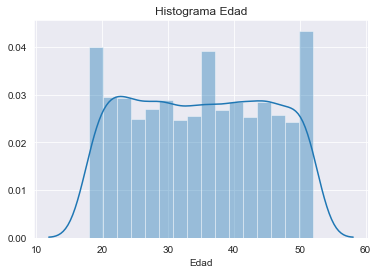

In [18]:
sns.set_style("darkgrid")
sns.distplot(data2['AGE'], bins = 'auto')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma Edad')

Text(0.5, 1.0, 'Histograma Región')

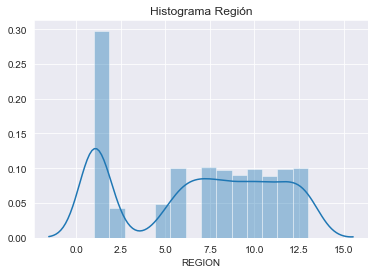

In [19]:
sns.distplot(data['REGION'], bins = 'auto')
plt.title('Histograma Región')
plt.ylabel('Frecuencia')

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

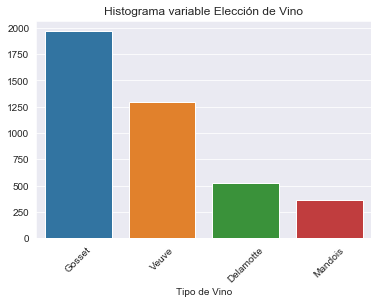

In [20]:
sns.countplot(data2['CHOSEN'])
plt.title('Histograma variable Elección de Vino')
plt.xlabel('Tipo de Vino')
plt.ylabel(None)
plt.xticks(rotation=45)

### Análisis preliminar de la base de datos

In [21]:
col_analizar = ['GENDER', 'WORK', 'INCOME','GRAD', 'FREQ', 'DRINKER', 'MARRIED','DENSIT' ]

In [22]:
def Analysis_Data(data, col_analizar):
    resumen_datos = pd.DataFrame()
    for i in col_analizar:
        #obtener valores de cada una de las características
        A = data[i].value_counts()
        #crear base de datos con el total y porcentaje de cada caracteerística
        B = pd.DataFrame({ 'Total' : A, 'Porcentaje': A.map(lambda x: x / A.sum())  })
        # crear multiindex
        B.index = pd.MultiIndex.from_product([[i], A.index.tolist()] )
        # unir a una sola base datos
        resumen_datos = pd.concat([resumen_datos, B], axis = 0)
    
    return resumen_datos

In [23]:
Analysis_Data(data2, col_analizar)

Total  Porcentaje
GENDER  Woman                              2421    0.582391
        Men                                1736    0.417609
WORK    Full time worker                   2458    0.591292
        Part-time worker                   1262    0.303584
        Unemployed                          437    0.105124
INCOME  Less than 15,000                   1535    0.369257
        Between 15,000 and 30,000          1500    0.360837
        More than 30,000                   1122    0.269906
GRAD    High school or less                2377    0.571807
        Undergraduate university studies   1170    0.281453
        Graduate or post-graduate degree    610    0.146740
FREQ    Occasional drinker                 2321    0.558335
        Regular drinker                    1836    0.441665
DRINKER Fairly ignorant wine-lover         1271    0.305749
        fairly knowledgeable wine-lover    1258    0.302622
        Absolute beginner                  1199    0.288429
        expert                              429    0.103199
MARRIED Single                             2281    0.548713
        Married                            1262    0.303584
        Divorced                            614    0.147703
DENSIT  Urban                              2584    0.621602
        Suburban                           1108    0.266538
        Rural                               465    0.111860

### Transformaciones a la base de datos

In [24]:
# Estratificar la edad. De acuerdo al histograma está relativamente uniformemente distribuida, así se plantean 3 intervalos del
#mismo rango. 18 a 30, 31 a 40 y 41 a 52.

In [25]:
def seg_age(row):
    if (row >= 18 and row <= 30):
        return '18 - 30'
    if (row >= 31 and row <= 40):
        return '31 - 40'
    if (row >= 41 and row <= 52):
        return '41 - 52'

In [26]:
data2.loc[:,'AGE'] = data2['AGE'].map(seg_age)

In [27]:
data2.head()

,CHOSEN,GENDER,AGE,WORK,GRAD,RELIG,STUDENT,MARRIED,PURCH,FACEBOOK,...,SMELL_VCP,SMELL_HM,COLOR_DEL,COLOR_GOS,COLOR_VCP,COLOR_HM,ADV_DEL,ADV_GOS,ADV_VCP,ADV_HM
PID,,,,,,,,,,,,,,,,,,,,,
1,Gosset,Men,41 - 52,Part-time worker,High school or less,Christian,Not a student,Divorced,No,No,...,4,4,4,5,4,5,1,4,4,3
2,Veuve,Woman,31 - 40,Full time worker,High school or less,Muslim,Not a student,Single,No,Yes,...,4,3,5,5,5,4,1,3,1,1
3,Gosset,Woman,18 - 30,Full time worker,High school or less,Christian,Not a student,Single,Yes,Yes,...,5,4,3,4,4,3,4,3,3,3
4,Delamotte,Woman,41 - 52,Part-time worker,High school or less,No religion,Not a student,Divorced,No,No,...,5,3,4,5,5,4,4,3,3,1
5,Gosset,Men,31 - 40,Full time worker,High school or less,No religion,University student,Divorced,No,Yes,...,5,5,3,4,4,4,3,5,3,4


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

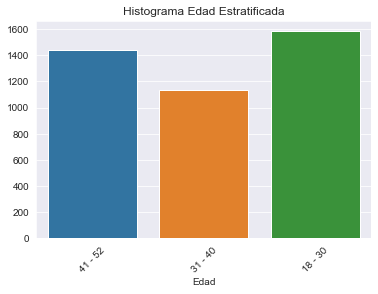

In [28]:
sns.countplot(data2['AGE'])
plt.title('Histograma Edad Estratificada')
plt.xlabel('Edad')
plt.ylabel(None)
plt.xticks(rotation=45)

#### Corelación entre variables

In [29]:
corr_analizar = ['CHOSEN', 'GENDER', 'WORK', 'INCOME','GRAD', 'FREQ', 'DRINKER', 'MARRIED','DENSIT' ]

In [30]:
data[corr_analizar].corr()

,CHOSEN,GENDER,WORK,INCOME,GRAD,FREQ,DRINKER,MARRIED,DENSIT
CHOSEN,1.000000,0.037858,0.014980,-0.032294,-0.031856,-0.030300,0.002251,0.019048,-0.010941
GENDER,0.037858,1.000000,0.000710,0.016278,-0.000057,-0.082246,0.010507,0.001436,0.058058
WORK,0.014980,0.000710,1.000000,0.002330,0.016414,0.005431,-0.009502,-0.009906,-0.018650
INCOME,-0.032294,0.016278,0.002330,1.000000,0.103142,0.005745,0.017098,0.004302,0.009463
GRAD,-0.031856,-0.000057,0.016414,0.103142,1.000000,-0.006327,0.088865,0.093857,0.013004
FREQ,-0.030300,-0.082246,0.005431,0.005745,-0.006327,1.000000,-0.035195,0.008774,0.008368
DRINKER,0.002251,0.010507,-0.009502,0.017098,0.088865,-0.035195,1.000000,0.125355,-0.011647
MARRIED,0.019048,0.001436,-0.009906,0.004302,0.093857,0.008774,0.125355,1.000000,-0.006085
DENSIT,-0.010941,0.058058,-0.018650,0.009463,0.013004,0.008368,-0.011647,-0.006085,1.000000


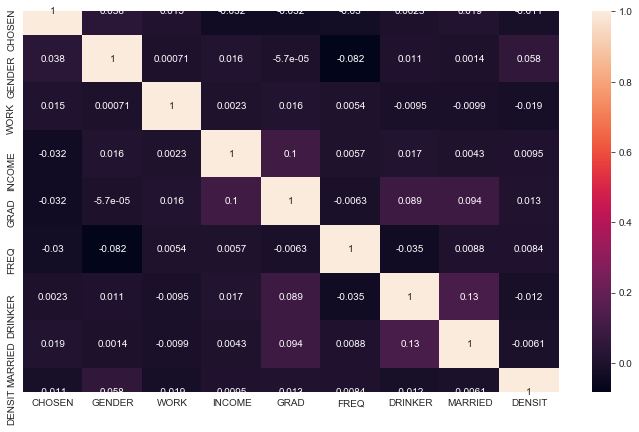

In [31]:
fig = plt.figure( figsize = (12,7) )
sns.heatmap(data = data[corr_analizar].corr(), annot = True)

In [32]:
#nnguna variable descriptiva de la población está muy correlacionada entre sí

### Correlación de las notas

In [34]:
var_no_deseadas = ['GENDER', 'AGE', 'WORK', 'GRAD', 'RELIG', 'STUDENT',
       'MARRIED', 'PURCH', 'FACEBOOK', 'TWITTER', 'INSTA', 'INCOME', 'KIDS',
       'ALONE', 'REGION', 'DENSIT', 'FREQ', 'DRINKER']

In [35]:
corr_analizar = set(data.columns.tolist()) - set(var_no_deseadas)
data[corr_analizar]

,PRICE_GOS,CHOSEN,ADV_DEL,PRICE_DEL,KNOWN_DEL,SMELL_VCP,ADV_VCP,PRICE_HM,ADV_GOS,LAB_VCP,...,BOTTLE_DEL,SMELL_HM,COLOR_VCP,KNOWN_GOS,LAB_GOS,INFLAB_DEL,INFLAB_GOS,PRICE_VCP,BOTTLE_HM,COLOR_HM
PID,,,,,,,,,,,,,,,,,,,,,
1,27.35,2,1,15.85,1,4,4,12.5,4,5,...,3,4,4,1,4,1,5,20.88,4,5
2,27.35,3,1,15.85,2,4,1,12.5,3,4,...,4,3,5,1,4,2,3,20.88,2,4
3,27.35,2,4,15.85,1,5,3,12.5,3,4,...,1,4,4,1,5,2,5,20.88,4,3
4,27.35,1,4,15.85,2,5,3,12.5,3,5,...,4,3,5,2,4,3,3,20.88,5,4
5,27.35,2,3,15.85,1,5,3,12.5,5,1,...,5,5,4,2,3,4,3,20.88,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4153,27.35,2,3,15.85,2,4,3,12.5,2,3,...,5,5,5,1,4,4,4,20.88,3,2
4154,27.35,1,3,15.85,2,5,3,12.5,3,3,...,3,4,5,2,4,5,4,20.88,4,4
4155,27.35,3,3,15.85,2,4,3,12.5,3,5,...,4,4,4,2,4,3,3,20.88,2,4


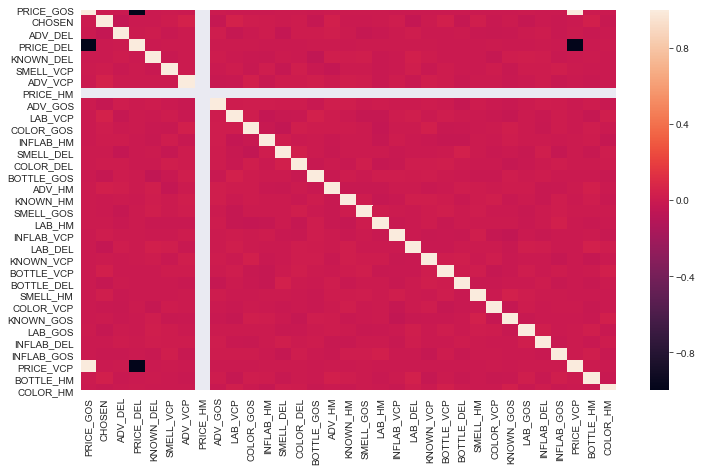

In [36]:
fig = plt.figure( figsize = (12,7) )
sns.heatmap(data = data[corr_analizar].corr(), annot = False)

#### Correlacion de Elección de vino con el resto de variables

In [37]:
data.corr()['CHOSEN'].sort_values(ascending = False).head(10)

CHOSEN        1.000000
ADV_VCP       0.050195
LAB_VCP       0.047785
GENDER        0.037858
BOTTLE_HM     0.037030
BOTTLE_VCP    0.036546
ADV_HM        0.031635
SMELL_HM      0.026342
MARRIED       0.019048
INFLAB_VCP    0.017315
Name: CHOSEN, dtype: float64

In [38]:
#muy baja correlacion con todos, tiene sentido al ser variables categóricas

### Juntar redes Sociales

In [39]:
data2.shape

(4157, 51)

In [40]:
def join_rrss():
    data2[['FACEBOOK', 'TWITTER', 'INSTA']].apply(LabelEncoder().fit_transform)
    data2.loc[:,'FACEBOOK'] = data2[['FACEBOOK', 'TWITTER', 'INSTA']].apply(LabelEncoder().fit_transform).apply(rrss, axis = 'columns')
    data2.rename(columns = {'FACEBOOK': 'RRSS'}, inplace = True)
    data2.drop(['TWITTER', 'INSTA'], axis = 1, inplace = True)
    
def rrss(row):
    use_rrss = row['FACEBOOK'] + row['TWITTER'] + row['INSTA']
    if use_rrss == 0:
        return 'Zero'
    if use_rrss == 1:
        return 'One'
    if use_rrss == 2:
        return 'Two'
    if use_rrss == 3:
        return 'Three'

In [46]:
join_rrss()
data2.shape

(4157, 49)

### Precios

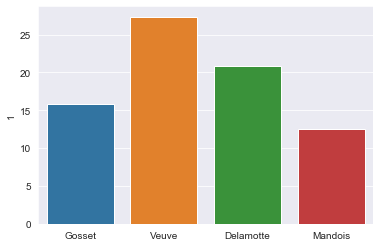

In [184]:
sns.barplot(data2['CHOSEN'].unique(), data.loc[1,['PRICE_DEL', 'PRICE_GOS', 'PRICE_VCP', 'PRICE_HM']])

Text(0.5, 1.0, 'Precio Vinos')

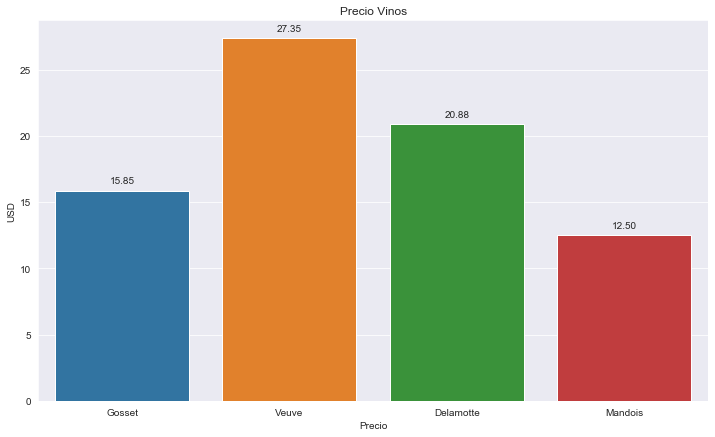

In [112]:
fig = plt.figure( figsize = (12,7) )
splot = sns.barplot(data2['CHOSEN'].unique(), data.loc[1,['PRICE_DEL', 'PRICE_GOS', 'PRICE_VCP', 'PRICE_HM']])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.xlabel('Precio')
plt.ylabel('USD')
plt.title('Precio Vinos')

### Tablas dinámicas

In [174]:
# tablas de chosen vs todas las otras variables
def table1(variables):
    for var in variables:
        pd.crosstab( data2[var], data2['CHOSEN']).plot(kind = 'bar')
        plt.title('Consumo de vino vs ' + var, fontsize = 15)
        plt.xticks(rotation = 45)
        plt.xlabel(None)

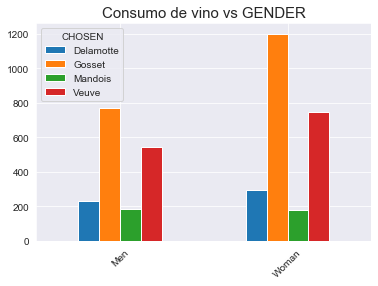

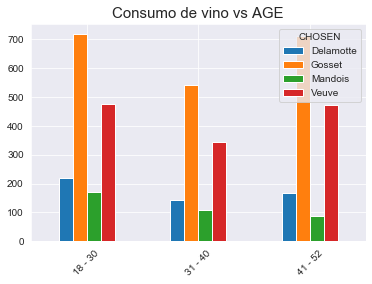

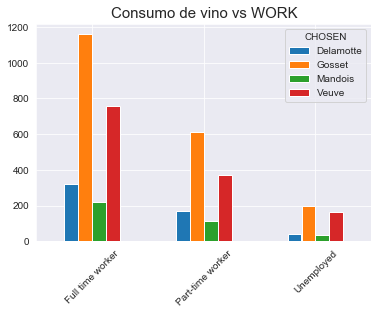

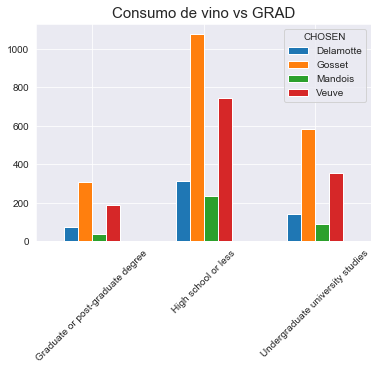

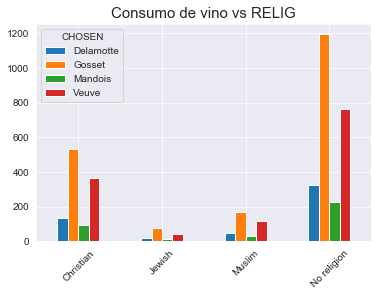

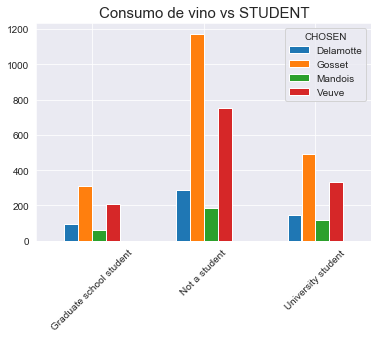

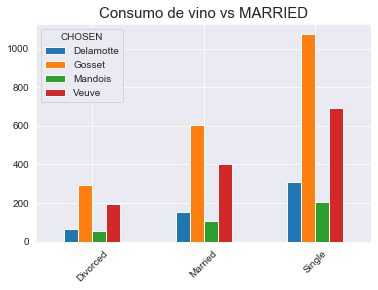

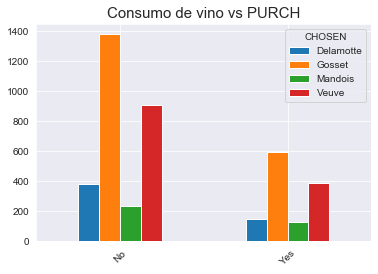

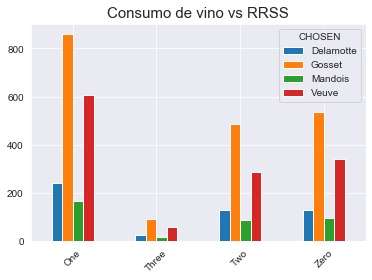

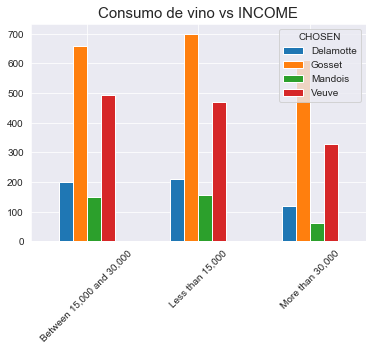

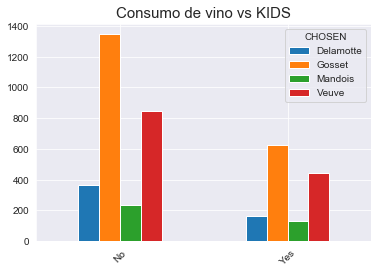

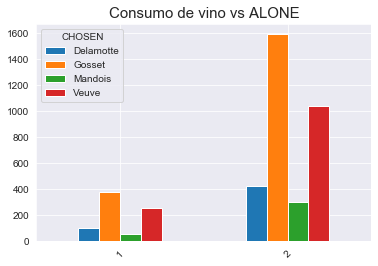

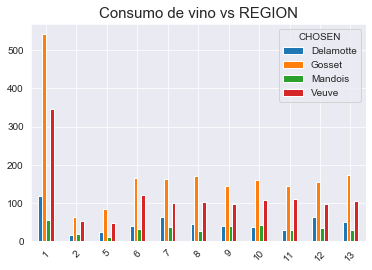

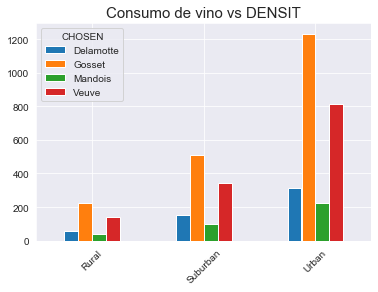

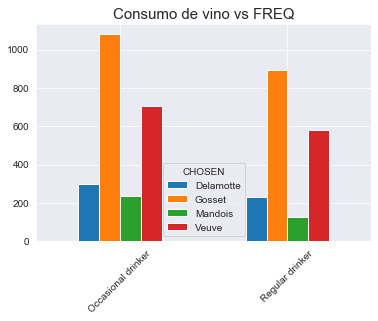

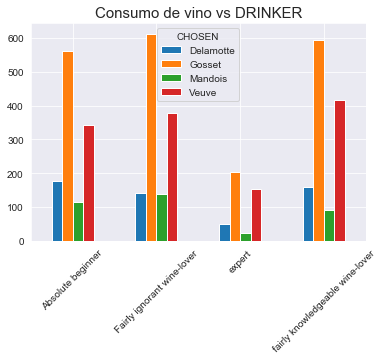

In [175]:
set1 = ['GENDER', 'AGE', 'WORK', 'GRAD', 'RELIG', 'STUDENT', 'MARRIED', 'PURCH', 'RRSS', 'INCOME', 'KIDS', 'ALONE', 'REGION',
       'DENSIT', 'FREQ', 'DRINKER']
table1(set1)

### tablas dinamicas con la proporcion

In [170]:
def table2(variables):
    for var in variables: 
        table = pd.crosstab( data2[var], data2['CHOSEN'])
        table.div(table.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (12,4) )
        plt.title('Consumo de vino vs ' + var, fontsize = 20)
        plt.xticks(rotation = 45)
        plt.xlabel(None)

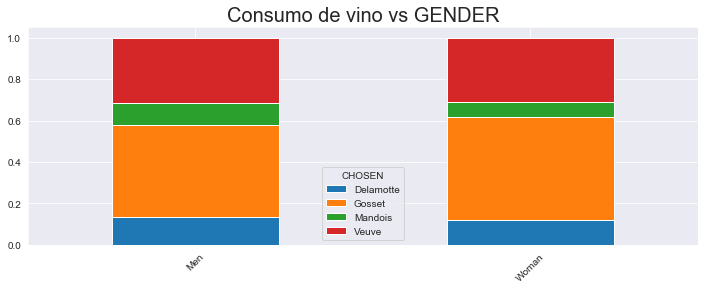

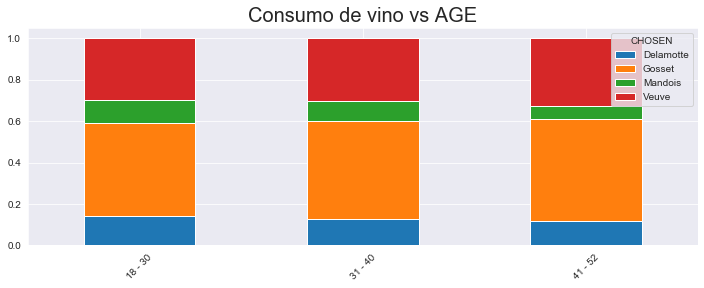

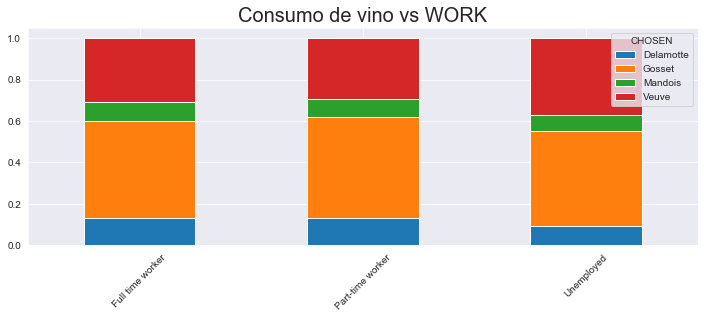

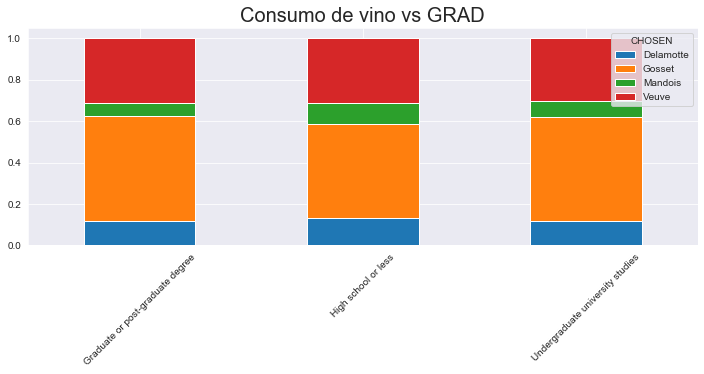

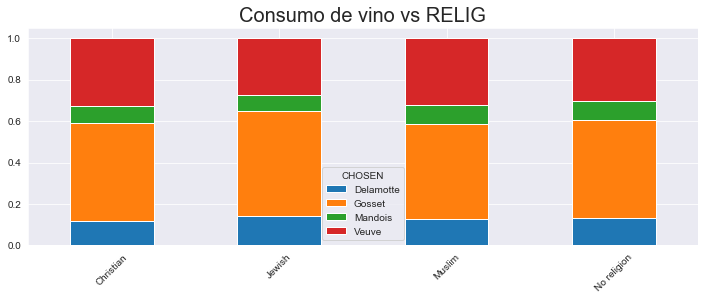

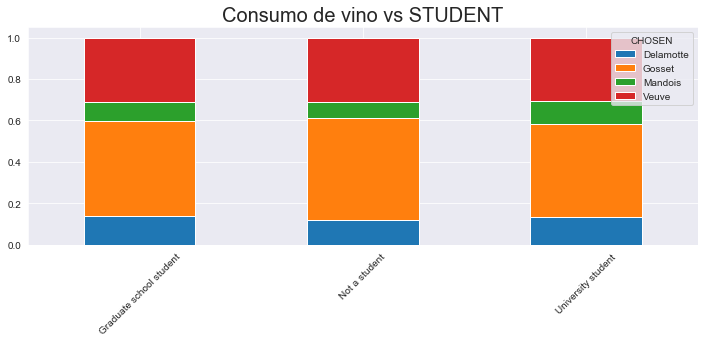

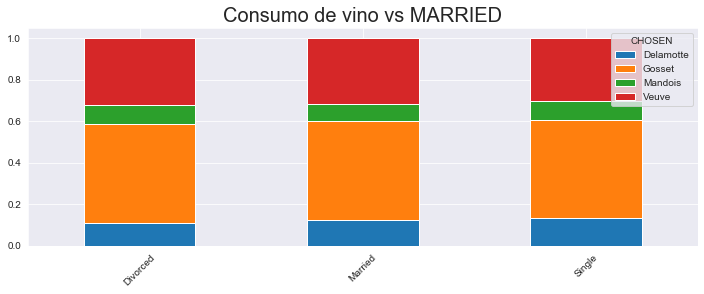

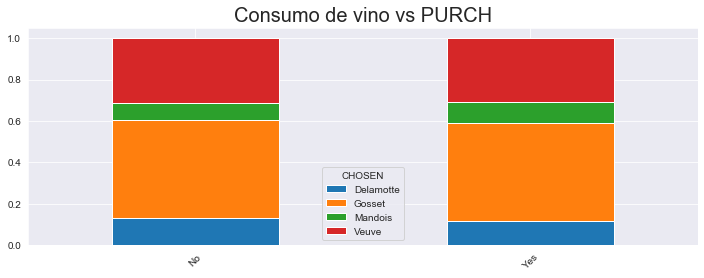

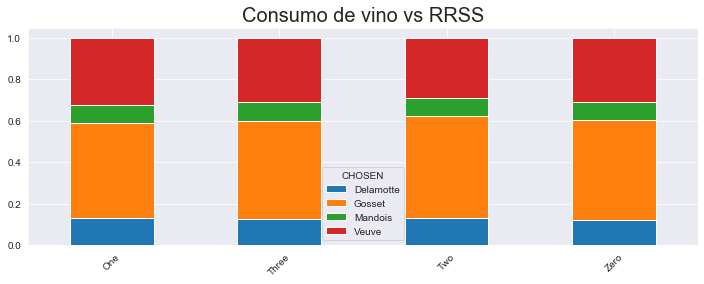

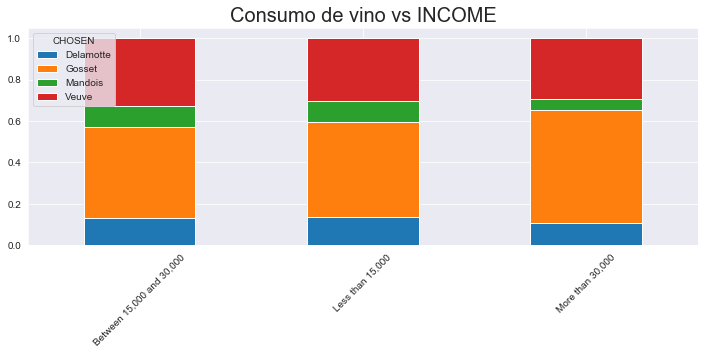

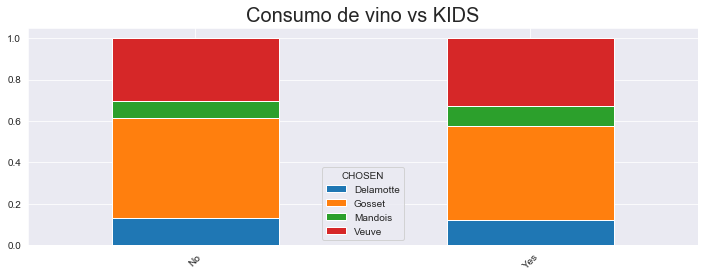

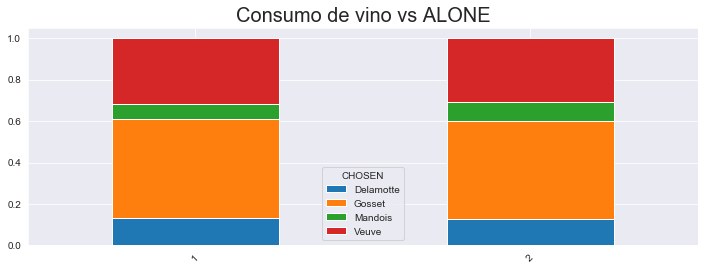

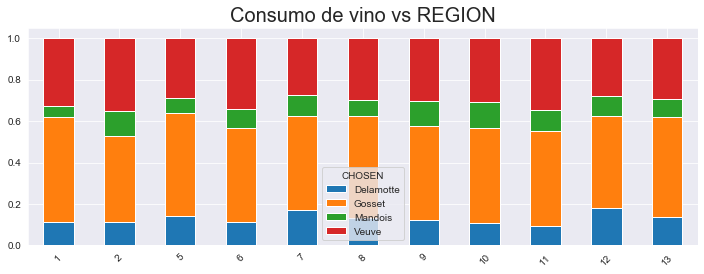

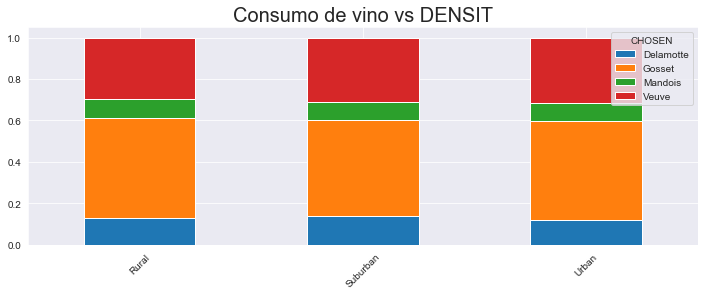

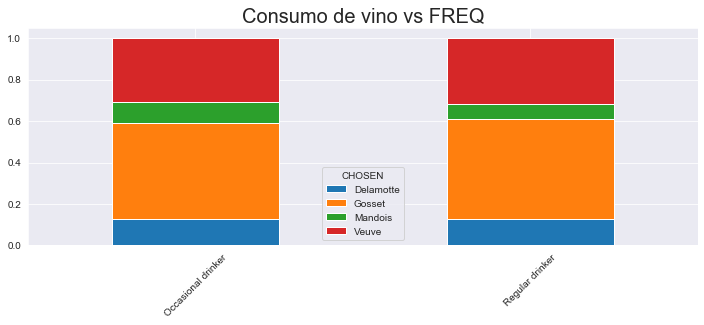

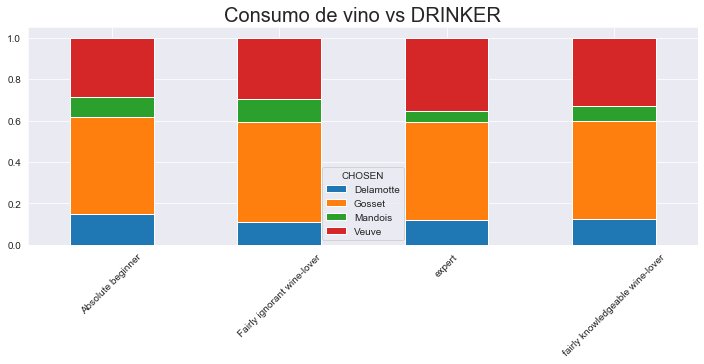

In [171]:
table2(set1)

### Tablas dinámicas con más variables

In [182]:
def table3(feature1, feature2):
    pd.crosstab([data2[feature1], data2[feature2]], data2['CHOSEN']).plot(kind = 'bar', figsize = (15,7) )
    plt.xticks(rotation = 45)
    plt.title('Comparacion ' + feature1 +  ' y Género ' + feature2)



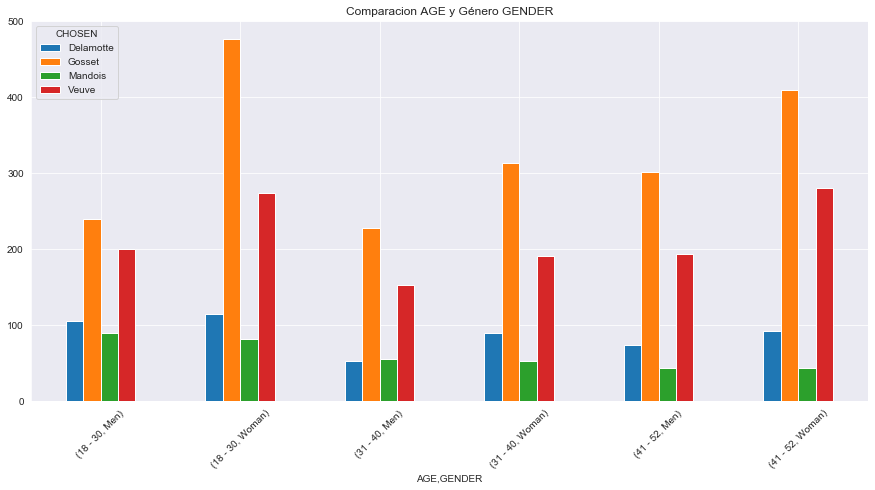

In [183]:
table3('AGE', 'GENDER')

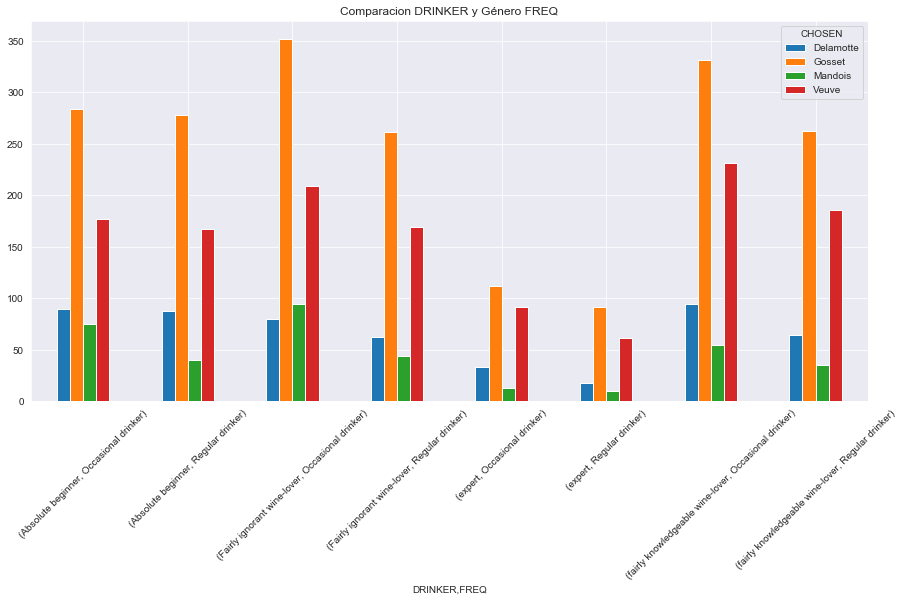

In [185]:
table3('DRINKER', 'FREQ')

### Tabla resumen de las elecciones de cada champaña de acuerdo a las características

In [289]:
def resume_table(variables, tipo = 'porcentaje'):
    aux = np.array(data2['CHOSEN'].value_counts().tolist()).reshape(1,4)
    resume = pd.DataFrame(aux / aux.sum() , columns = ['Gosset','Veuve','Delamotte','Mandois'])
    resume.index =  pd.MultiIndex.from_product([ ['CHOSEN']  , ['Promedio'] ] )
    if tipo == 'contar':
        for var in variables:
            data = pd.crosstab(data2[var], data2['CHOSEN'])
            data.index = pd.MultiIndex.from_product([ [var]  , data2[var].unique().tolist() ] )
            resume = pd.concat((resume,data) , axis = 0)
    if tipo == 'porcentaje':
        for var in variables:
            data = pd.crosstab(data2[var], data2['CHOSEN'])
            data = data.div(data.sum(1).astype(float), axis = 0)
            data.index = pd.MultiIndex.from_product([ [var]  , data2[var].unique().tolist() ] )
            resume = pd.concat((resume,data) , axis = 0)
            
    return resume
    

In [290]:
set1 = ['GENDER', 'AGE', 'WORK', 'GRAD', 'RELIG', 'STUDENT', 'MARRIED', 'PURCH', 'RRSS', 'INCOME', 'KIDS', 'ALONE',
       'DENSIT', 'FREQ', 'DRINKER']
resume_table(set1)

C:\Users\joseo\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app


CHOSEN                                    Delamotte    Gosset   Mandois  \
CHOSEN  Promedio                           0.127255  0.474140  0.088044   
GENDER  Men                                0.134217  0.443548  0.107719   
        Woman                              0.122264  0.496076  0.073936   
AGE     41 - 52                            0.139608  0.452937  0.108023   
        31 - 40                            0.125000  0.477113  0.095070   
        18 - 30                            0.115438  0.495132  0.060501   
WORK    Part-time worker                   0.129780  0.471928  0.089504   
        Full time worker                   0.133914  0.484152  0.089540   
        Unemployed                         0.093822  0.457666  0.075515   
GRAD    High school or less                0.119672  0.506557  0.062295   
        Graduate or post-graduate degree   0.132941  0.452671  0.100126   
        Undergraduate university studies   0.119658  0.500855  0.076923   
RELIG   Christian                          0.118117  0.470693  0.084369   
        Muslim                             0.143791  0.503268  0.078431   
        No religion                        0.126685  0.460916  0.091644   
        Jewish                             0.130435  0.475868  0.089749   
STUDENT Not a student                      0.140089  0.459016  0.092399   
        University student                 0.119783  0.489983  0.077212   
        Graduate school student            0.135780  0.448624  0.109174   
MARRIED Divorced                           0.109121  0.477199  0.092834   
        Single                             0.122029  0.478605  0.082409   
        Married                            0.135028  0.470846  0.089873   
PURCH   No                                 0.131633  0.474500  0.081323   
        Yes                                0.117131  0.473307  0.103586   
RRSS    Zero                               0.129462  0.458178  0.088972   
        One                                0.125000  0.473958  0.093750   
        Three                              0.132457  0.491405  0.086957   
        Two                                0.119199  0.485896  0.086442   
INCOME  Between 15,000 and 30,000          0.133333  0.439333  0.098667   
        More than 30,000                   0.137459  0.455375  0.101629   
        Less than 15,000                   0.105169  0.546346  0.055258   
KIDS    No                                 0.130419  0.482623  0.083841   
        Yes                                0.120791  0.456808  0.096633   
ALONE   2                                  0.133250  0.475716  0.074720   
        1                                  0.125820  0.473763  0.091234   
DENSIT  Urban                              0.129032  0.483871  0.090323   
        Suburban                           0.139892  0.462996  0.088448   
        Rural                              0.121517  0.477167  0.087461   
FREQ    Regular drinker                    0.127962  0.464886  0.102111   
        Occasional drinker                 0.126362  0.485839  0.070261   
DRINKER fairly knowledgeable wine-lover    0.148457  0.468724  0.095913   
        Absolute beginner                  0.111723  0.482297  0.108576   
        Fairly ignorant wine-lover         0.118881  0.473193  0.053613   
        expert                             0.125596  0.471383  0.071542   

CHOSEN                                       Veuve  
CHOSEN  Promedio                          0.310561  
GENDER  Men                               0.314516  
        Woman                             0.307724  
AGE     41 - 52                           0.299431  
        31 - 40                           0.302817  
        18 - 30                           0.328929  
WORK    Part-time worker                  0.308788  
        Full time worker                  0.292393  
        Unemployed                        0.372998  
GRAD    High school or less               0.311475  
        Graduate or post-graduate degree 